# Projects with playing cards

In this notebook, we look at some fun mini-projects one can implement using the **dobble** package's `Card` class.

Before running this notebook, make sure that you have installed the **dobble** package in your virtual environment.  
We start by performing all necessary imports.

In [1]:
from pathlib import Path

import numpy as np
from PIL import Image

from dobble import Card
from utils import *

## Playing card GIFs

While *Dobble* cards are awesome by themselves, we can make them even more enjoyable by adding some animations to them. To do so,  
we can combine multiple images of the same or different cards and create fun GIFs out of them.


### Creating a README GIF

We start by creating a GIF to use in the project's README that showcases some of the cards one can create using the **dobble**  
package. First, we write a simple function that horizontally combines two images into a single image. That way, we can later  
display two cards next to each other.

In [2]:
def create_tile_img(
    img1: Image.Image,
    img2: Image.Image,
    padding: int
) -> Image.Image:
    """Horizontally combine two images into a single image.

    Args:
        img1: The image to be placed on the left side.
        img2: The image to be placed on the right side.
        padding: The padding between the two images in pixels.

    Returns:
        The two images combined into a single image with the specified
        padding between the two individual images.

    Raises:
        ValueError: If one (or both) of the images are not square images
          or the two images are not identical in size.
    """

    if not (
        img1.size[0] == img1.size[1]
        and img2.size[0] == img2.size[1]
        and img1.size[0] == img2.size[0]
    ):
        raise ValueError("Both images must be square images of the same size!")
    
    img_size = img1.size[0]
    tile_img = Image.new("RGBA", (2 * img_size + padding, img_size))
    tile_img.paste(img1, (0, 0))
    tile_img.paste(img2, (img_size + padding, 0))

    return tile_img


Next, we load the card images that we created in the [cards_examples.ipynb](cards_examples.ipynb) notebook, and we resize them  
to be 512x512 pixels large.

In [3]:
# Path to directory storing card images
IMG_DIR = Path("../imgs/cards")

# Load all 6 card images
activities_img = Image.open(IMG_DIR / "activities_cci_5.png").resize((512, 512))
animals_img = Image.open(IMG_DIR / "animals_ccic_7.png").resize((512, 512))
brands_img = Image.open(IMG_DIR / "brands_ccis_5.png").resize((512, 512))
coffee_img = Image.open(IMG_DIR / "coffee_ccir_8.png").resize((512, 512))
fruits_img = Image.open(IMG_DIR / "fruits_ccib_6.png").resize((512, 512))
mixed_img = Image.open(IMG_DIR / "mixed_ccib_6.png").resize((512, 512))

Next, we arrange the images in pairs and then create tile images using the `create_tile_img` function.

In [4]:
# Arrange images in pairs
img_pairs = [
    (mixed_img, coffee_img),
    (fruits_img, activities_img),
    (brands_img, animals_img)
]

# Create tile images
tile_imgs = []
for img_pair in img_pairs:
    tile_imgs.append(create_tile_img(img_pair[0], img_pair[1], 50))

Next, we write a function that takes a list of PIL images, and turns them into a GIF.

In [5]:
def create_gif_from_imgs(
    imgs: list[Image.Image],
    fpath: str | Path,
    frame_duration: int = 1000,
    fading_frames: int = 10,
    fading_delay: int = 100
) -> None:
    """Create a GIF from a list of images.

    Args:
        imgs: The list of images to turn into a GIF.
        fpath: The path used to save the GIF.
        frame_duration: The time (in ms) to display each individual
          image.
        fading_frames: The number of frames used to fade between
          consecutive images.  Set to 1 to disable fading.
        fading_delay: The delay (in ms) between the fading frames.
    """

    num_imgs = len(imgs)
    alphas = np.linspace(0, 1, num=fading_frames, endpoint=False)

    # Create frames of GIF
    gif_imgs = []
    for pair in range(0, num_imgs):
        for idx, alpha in enumerate(alphas):
            blended_img = Image.blend(imgs[pair], imgs[(pair + 1) % num_imgs], alpha)
            blended_img.info["duration"] = frame_duration if idx == 0 else fading_delay
            gif_imgs.append(blended_img)

    # Save GIF
    gif_imgs[0].save(
        str(fpath),
        format='GIF',
        save_all=True,
        append_images=gif_imgs[1:],
        loop=0
    )


We apply this function right away to create our GIF to use in this project's README.

In [6]:
create_gif_from_imgs(
    tile_imgs,
    IMG_DIR / "card_examples.gif"
)

And here is the result:

<br>
<img src="../imgs/cards/card_examples.gif" width="800">

### Animating individual playing cards

We can also use the `rotate()` method(s) for cards and emojis to animate playing cards. To do so, let's first recreate one of the  
cards we created in the [cards_examples.ipynb](cards_examples.ipynb) notebook.

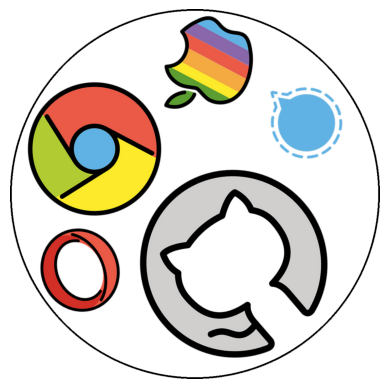

In [7]:
# Recreate card from "cards_examples.ipynb"
emojis = [
    "Opera",
    "signal",
    "apple",
    "Chrome",
    "github"
]
card = Card(emojis, packing="ccis")
card.rotate_emojis(seed=30)
card.rotate(seed=24)
card_img = card.get_img(padding=0.1)
display_card_inline(card_img)

In [8]:
def create_rotating_card(
    card: Card,
    fpath: str | Path,
    rotation_step: int = 2,
    padding: float = 0.1,
    img_size: int = 512,
) -> None:
    """Create a GIF of a rotating card.

    Args:
        card: The card to turn into a GIF.
        fpath: The path used to save the GIF.
        rotation_step: The number of degrees to rotate the card for in
          each frame of the GIF.  Must be a factor of 360.
        padding: The padding around each emoji image as a fraction
          of the image size.  Must be in the range [0, 1).
        img_size: The size of the square image in pixels.

    Raises:
        ValueError: If ``rotation_step`` is not a factor of 360.
    """
    
    if 360 % rotation_step != 0:
        raise ValueError(f"'rotation_step' must be a factor of 360, got {rotation_step}!")

    num_rotations = 360 // rotation_step
    rotation_imgs = []
    for _ in range(0, num_rotations):
        card_img = draw_outline(card.get_img(
            padding=padding,
            img_size=img_size
        ))
        rotation_imgs.append(card_img)
        card.rotate(rotation_step)

    create_gif_from_imgs(
        rotation_imgs,
        fpath,
        frame_duration=50,
        fading_frames=1
    )


Let's illustrate our new function using the card we have just created.

In [9]:
create_rotating_card(
    card,
    IMG_DIR / "brands_animated.gif"
)

Let's look at the result:

<br>
<img src="../imgs/cards/brands_animated.gif" width="350">